In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import scipy as sc
import matplotlib.pyplot as plt
import scipy.stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.neighbors import KernelDensity
from scipy.optimize import minimize

In [2]:
data = []
with open('Math16.txt') as f:
    lines = f.readlines()
    for line in lines:
        data.append(float(line))
data = np.array(data)   

In [3]:
print(data)

[335. 277. 335. ... 258. 259. 368.]


**<h1>1.1<h1>**

(array([0.00055514, 0.00138784, 0.00209719, 0.00388596, 0.00635324,
        0.00808033, 0.00943734, 0.00777192, 0.00619904, 0.00277569]),
 array([201. , 221.6, 242.2, 262.8, 283.4, 304. , 324.6, 345.2, 365.8,
        386.4, 407. ]),
 <BarContainer object of 10 artists>)

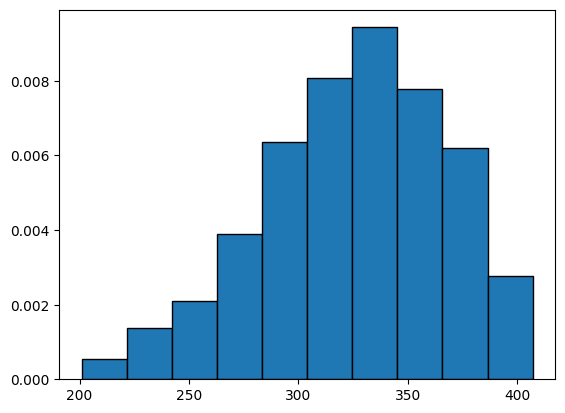

In [4]:
plt.hist(data, density=True, edgecolor="black")

C:\Users\timo2\AppData\Local\Temp\ipykernel_12828\2279633282.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data, kde=True)


<AxesSubplot:ylabel='Density'>

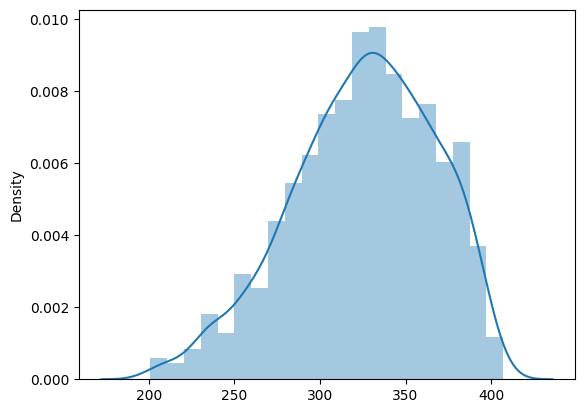

In [5]:
sb.distplot(data, kde=True)

In [6]:
data = data[:, None]
print(data.shape)

(1574, 1)


In [7]:
X = np.sort(data[:, 0])

**Gaussian**

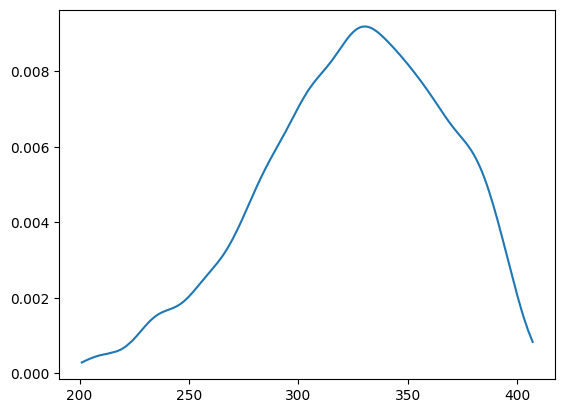

In [8]:
kde_g = KernelDensity(kernel='gaussian', bandwidth=8.0).fit(data)
log_density = kde_g.score_samples(X[:, None])
plt.plot(X[:, None], np.exp(log_density))

In [35]:
def K_gauss(x):
    return 1 / np.sqrt(2 * np.pi) * np.exp(- x**2 / 2)

In [36]:
def K_K_gauss(x):
    return 1 / (2 * np.sqrt(np.pi)) * np.exp(- x**2 / 4)

In [37]:
def K__g(x):
    return K_K_gauss(x) - 2 * K_gauss(x)

In [38]:
def J_g(h):
    n = len(data)
    j = 0
    for i in range (n):
        for j in range(n):
            K__g((data[i][0] - data[j][0]) / h)
    j = 1 / (h * n**2) * j + 2 / (n * h) * K_gauss(0)
    return j

In [39]:
h_data = np.arange(1, 100, 1)
j_data = J_g(h_data)
plt.plot(h_data, j_data)

KeyboardInterrupt: 

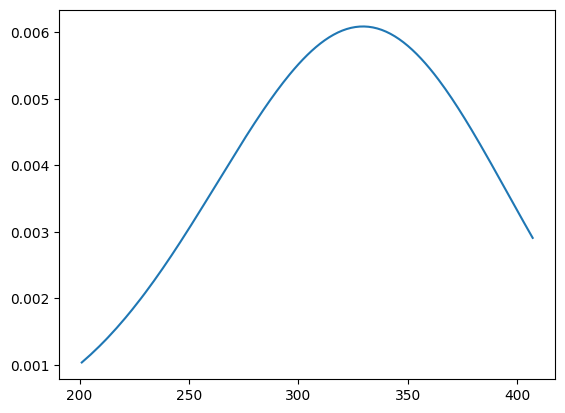

In [9]:
kde_g = KernelDensity(kernel='gaussian', bandwidth=50.0).fit(data)
log_density = kde_g.score_samples(X[:, None])
plt.plot(X[:, None], np.exp(log_density))

**Tophat**

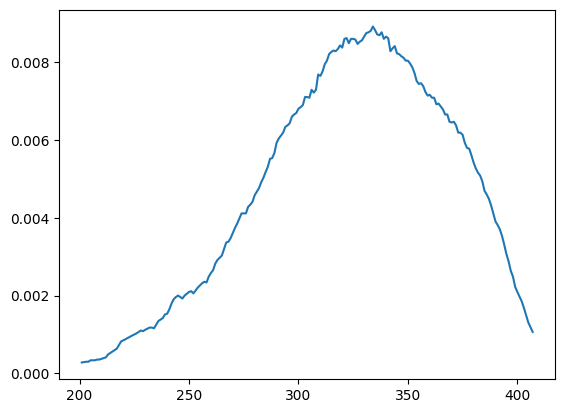

In [10]:
kde_t = KernelDensity(kernel='tophat', bandwidth=17.0).fit(data)
log_density = kde_t.score_samples(X[:, None])
plt.plot(X[:, None], np.exp(log_density))

In [ ]:
def K_tophat(x):
    if -1 <= x and x <= 1:
        return 1/2
    else:
        return 0

In [ ]:
def K_K_tophat(x):
    if 0 <= x and x <= 2:
        return -x /4 + 1/2
    elif -2 <= x and x < 0:
        return x / 4 + 1/2
    else:
        return 0

In [ ]:
def K__t(x):
    return K_K_tophat(x) - 2 * K_tophat(x)

In [ ]:
def J_t(h):
    n = len(data)
    j = 0
    for i in range (n):
        for j in range(n):
            K__t((data[i][0] - data[j][0]) / h)
    j = 1 / (h * n**2) * j + 2 / (n * h) * K_tophat(0)
    return j

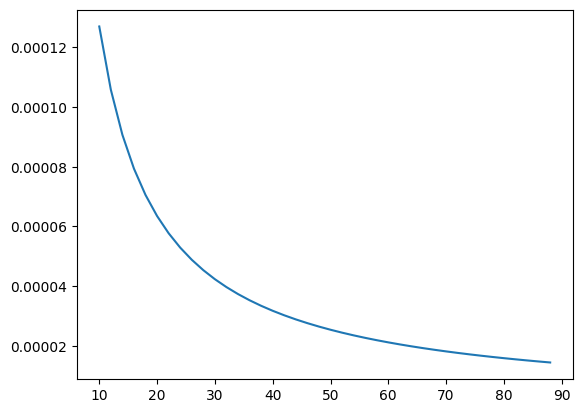

In [ ]:
h_data = np.arange(10, 90, 2)
j_data = [J_t(h_) for h_ in h_data]
plt.plot(h_data, j_data)

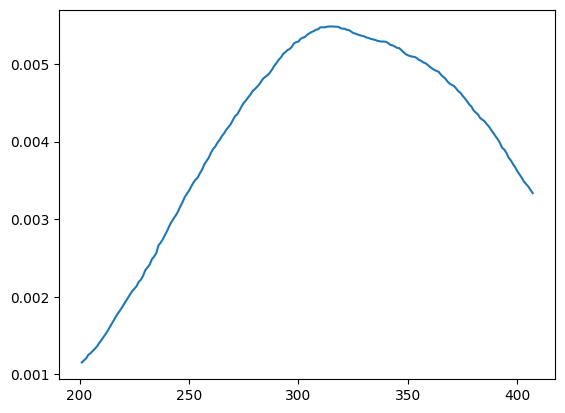

In [11]:
kde_t = KernelDensity(kernel='tophat', bandwidth=90.0).fit(data)
log_density = kde_t.score_samples(X[:, None])
plt.plot(X[:, None], np.exp(log_density))

**<h1>1.2<h1>**

In [12]:
n = len(data[:, 0])

In [13]:
def F(x, X):
    a = len([x_i for x_i in X if x_i <= x])
    return a / len(X)

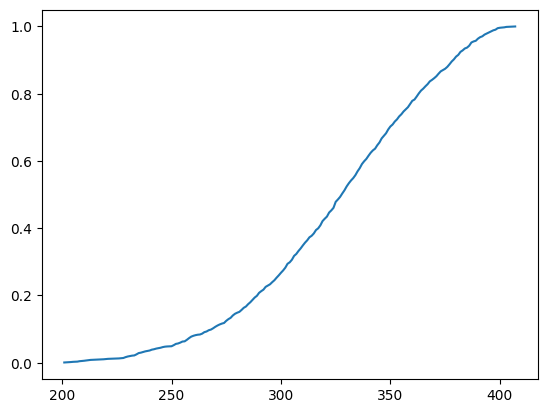

In [14]:
#X = np.linspace(data.min(), data.max(), 1000)
X = np.sort(data[:, 0])
Y = [F(x, data) for x in X]
plt.plot(X, Y)

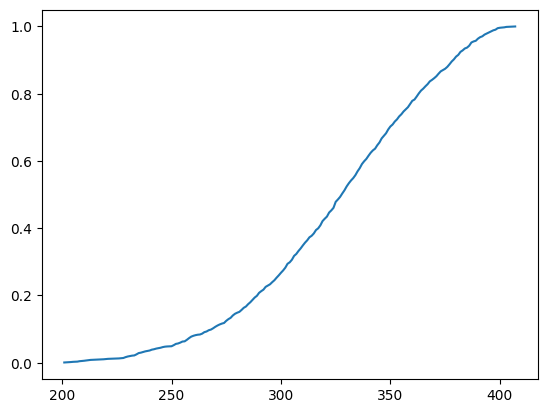

In [15]:
ecdf = ECDF(data[:, 0])
plt.plot(X, ecdf(X))

In [16]:
q_25 = []
q_75 = []
for x in X:
    if ecdf(x) <= 0.25:
        q_25.append(x)
    if ecdf(x) <= 0.75:
        q_75.append(x)
q_25 = np.sort(q_25)[-1]
q_75 = np.sort(q_75)[-1]
q_q = q_75 - q_25
print(q_25, q_75, q_q, sep='\n')

297.0
356.0
59.0


**Pivotal**

In [17]:
q_q_bt = np.zeros(200)
for j in range(200):
    X_bt = []
    for i in range(n):
        id = np.random.randint(0, n - 1)
        X_bt.append(X[id])
    ecdf_bt = ECDF(X_bt)

    q_25_bt = []
    q_75_bt = []
    for x in X_bt:
        if ecdf_bt(x) <= 0.25:
            q_25_bt.append(x)
        if ecdf_bt(x) <= 0.75:
            q_75_bt.append(x)
    q_25_bt = np.sort(q_25_bt)[-1]
    q_75_bt = np.sort(q_75_bt)[-1]
    q_q_bt[j] = q_75_bt - q_25_bt

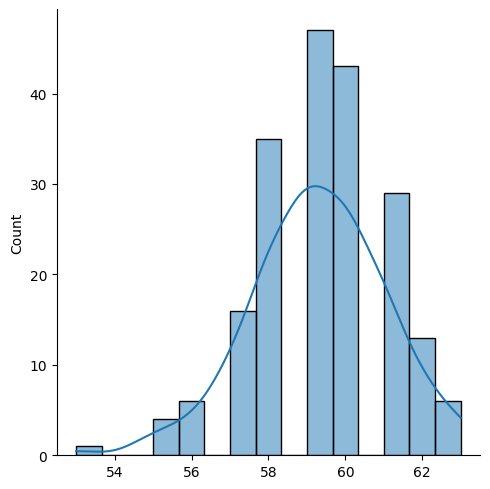

In [18]:
delta = 2 * q_q - q_q_bt
delta = np.sort(delta)
sb.displot(delta, kde="True")

In [19]:
x_g = np.quantile(delta, 0.025)
x_b = np.quantile(delta, 1 - 0.025)
print((x_g, x_b))

(55.975, 63.0)


**Delta method**

In [20]:
alpha=0.05
n = len(data[:, 0])
z_a = scipy.stats.norm.ppf(1 - alpha / 2)

$\hat{p}(x) = \frac{1}{hn\sqrt{2\pi}} \sum_{i=i}^n e^{-\frac{(x-X_{i})^2}{2h^2}}$

In [21]:
def p_(x, X, h, n):
    res = 0
    for x_i in X:
        res += np.exp(-(x - x_i)**2 / (2*h**2))
    return 1 / (h * n * np.sqrt(2*np.pi)) * res

In [22]:
n = len(X)
h = n**(-1/5)

I_1 = (0.75 - 1) / p_(q_75, X, h, n) - (0.25 - 1) / p_(q_25, X, h, n) 
I_2 = (0.75 - 1) / p_(q_75, X, h, n) - (0.25) / p_(q_25, X, h, n) 
I_3 = (0.75) / p_(q_75, X, h, n) - (0.25) / p_(q_25, X, h, n) 

sigma_2 = I_1**2 * 0.25 + I_2**2 * 0.5 + I_3**2 * 0.25
print((q_q - z_a * np.sqrt(sigma_2) / np.sqrt(n), q_q + z_a * np.sqrt(sigma_2) / np.sqrt(n)))

(56.830067358954174, 61.169932641045826)


In [23]:
def I(x, q, q_num):
    # p = 1 / n
    # count = 0
    # for i in range(n):
    #     if X[i] == q_num:
    #         count = count + 1
    # p = count / n

    n = len(X)
    h = n**(-1/5)
    p = p_(x, X, h, n)
    
    if x <= q_num:
        return (q - 1) / p
    else:
        return q / p

In [24]:
def I_f(x):
    return I(x, 0.75, q_75) - I(x, 0.25, q_25)

In [25]:
S2 = 0
for x in X:
    S2 += I_f(x)**2
S2 = S2 / n

In [26]:
print((q_q - z_a * np.sqrt(S2) / np.sqrt(n), q_q + z_a * np.sqrt(S2) / np.sqrt(n)))

(55.085389244564375, 62.914610755435625)


-------------------------------------------------------------

In [191]:
def CDF_X(x, y):
    if y >= x:
        return 1
    else :
        return 0

In [192]:
def F_(x, y, p):
    return (1 - p) * ecdf(y) + p * CDF_X(x, y)

In [193]:
print(ecdf(245), F_(389, 245, 0.1))

0.044472681067344345 0.040025412960609914


In [205]:
def L(x, Y, p):
    q_25_ = []
    q_75_ = []
    for y in Y:
        if F_(x, y, p) <= 0.25:
            q_25_.append(y)
        if F_(x, y, p) <= 0.75:
            q_75_.append(y)
    q_25_ = np.sort(q_25_)[-1]
    q_75_ = np.sort(q_75_)[-1]
    q_q_ = q_75_ - q_25_
    #print(q_25_, q_25, q_75_, q_75, q_q_, q_q)
    return (q_q_ - q_q) / p

In [221]:
print(L(367, X, 0.001))

0.0


In [207]:
tau_ = 0
for i in range(len(data)):
    tau_ = tau_ + (L(data[i, 0], X, 1e-3))**2
tau_ = 1 / len(data) * tau_

In [208]:
print(tau_)

0.0


In [209]:
alpha = 0.05
z_a = scipy.stats.norm.ppf(1 - alpha / 2)
print((q_q - (tau_ * z_a) / np.sqrt(len(data)), q_q + (tau_ * z_a) / np.sqrt(len(data))))

(58.97497497497494, 58.97497497497494)


**<h1>1.3<h1>**

In [27]:
epsDVK = np.sqrt(-np.log(alpha/2)/(2*n))
print("eps DVK:", epsDVK)
print("n:", n)

eps DVK: 0.03423181054627911
n: 1574


In [28]:
epsKolm = sc.special.kolmogi(alpha) / np.sqrt(n)
print("eps Kolmogorov:", epsKolm)

eps Kolmogorov: 0.03423173804433633


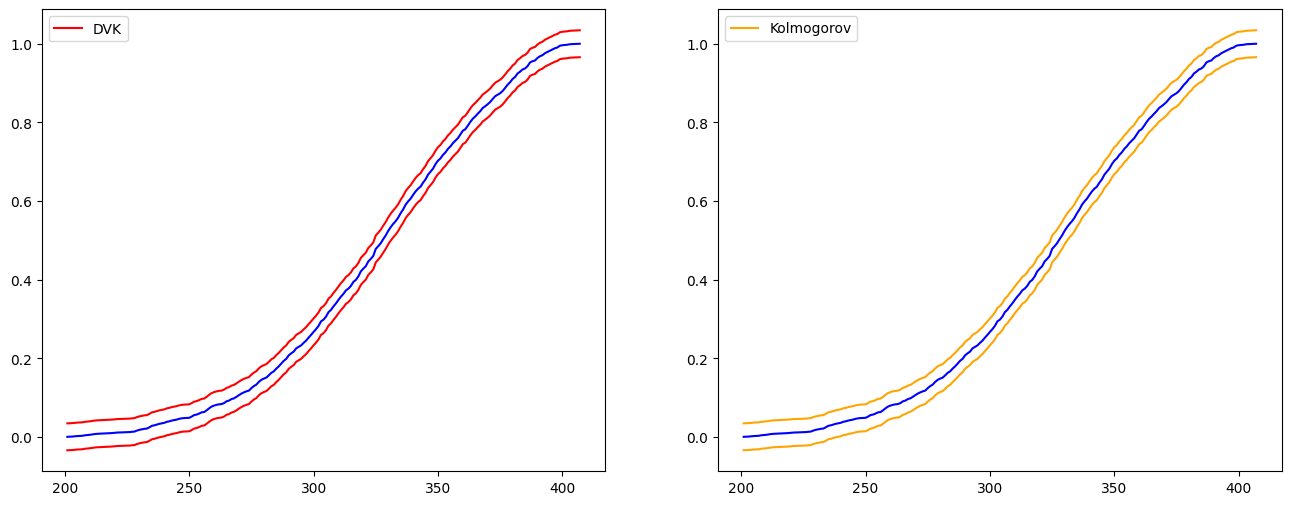

In [29]:
ax = plt.figure(figsize=(16, 6)).subplots(1, 2)
ax[0].plot(X, ecdf(X), c='blue')
ax[0].plot(X, ecdf(X) - epsDVK, c='red', label='DVK')
ax[0].plot(X, ecdf(X) + epsDVK, c='red')
ax[0].legend()
ax[1].plot(X, ecdf(X), c='blue')
ax[1].plot(X, ecdf(X) - epsKolm, c='orange', label='Kolmogorov')
ax[1].plot(X, ecdf(X) + epsKolm, c='orange')
ax[1].legend()